## ======  GDA: DATA SET 1 ==========

### Reading Input Dataset: 2D Attribytes & Class Labels

In [1]:
import csv
import os

In [2]:
x1_attributes = []
x2_attributes = []
labels = []
__location__ = os.path.realpath(os.path.join(os.getcwd(), "dataset_binary/x_attributes.csv"))
print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
    x1_attributes.append(float(row[0]))     # row is a list containing two element
    x2_attributes.append(float(row[1]))     # row is a list containing two element

__location__ = os.path.realpath(os.path.join(os.getcwd(), "dataset_binary/y_class_labels.csv"))
print ("fetching data from location: " + __location__ + " . . .")
with open(__location__, 'r') as csvfile:   # Open the CSV file in read mode # Create a reader object
  csv_reader = csv.reader(csvfile)
  for row in csv_reader:  # Iterate through the rows in the CSV file
      labels.append(float(row[0]))     # row is a list containing single element

print ("number of data points: " + str(len(x1_attributes)))
if len(x1_attributes) != len(labels) or len(x2_attributes) != len(labels):
    print ("ERROR! Input number of attributed does not match the number of class labels!")
    exit(0)

fetching data from location: /Users/dishantgoyal/Desktop/ml/1_gda_classification/dataset_binary/x_attributes.csv . . .
fetching data from location: /Users/dishantgoyal/Desktop/ml/1_gda_classification/dataset_binary/y_class_labels.csv . . .
number of data points: 100


### Plotting Dataset

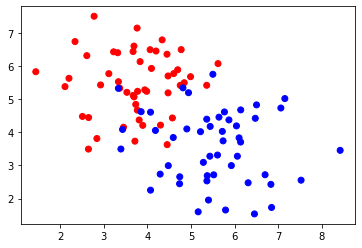

In [3]:
from matplotlib import pyplot as plt
color = []
for y in labels:
    if y == 0:
        color.append('red')
    else:
        color.append('blue')
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.show()

### Compute Mean Vector and Covariance Matrix for Each Class

In [4]:
import statistics

class1_x1 = []
class1_x2 = []

class2_x1 = []
class2_x2 = []

for index in range(0, len(x1_attributes)):
    if labels[index] == 0:
        class1_x1.append(x1_attributes[index])
        class1_x2.append(x2_attributes[index])
    else:
        class2_x1.append(x1_attributes[index])
        class2_x2.append(x2_attributes[index])
        
mean_class1 = [0,0]
mean_class2 = [0,0]
mean_class1[0] = statistics.mean(class1_x1)
mean_class1[1] = statistics.mean(class1_x2)
mean_class2[0] = statistics.mean(class2_x1)
mean_class2[1] = statistics.mean(class2_x2)
print("mean of class 1: ", mean_class1)
print("mean of class 2: ", mean_class2)

mean of class 1:  [3.726092, 5.469638]
mean of class 2:  [5.511342, 3.576098]


In [5]:
import numpy as np

common_cov_matrix = np.array([[0,0],[0,0]], dtype='float32')

cov_class_1 = np.array([[0,0],[0,0]], dtype='float32')
mean_1_vector = np.array([[mean_class1[0], mean_class1[1]]],     dtype='float32')
for index in range(0, len(class1_x1)):
    vector        = np.array([[class1_x1[index], class1_x2[index]]], dtype='float32')
    diff_vector = vector - mean_1_vector
    cov_class_1 += np.matmul(diff_vector.transpose(), diff_vector)
common_cov_matrix += cov_class_1
cov_class_1 = cov_class_1/len(class1_x1)

print ("\nCovariance Matrix of Class 1: \n", cov_class_1)

cov_class_2 = np.array([[0,0],[0,0]], dtype='float32')
mean_2_vector = np.array([[mean_class2[0], mean_class2[1]]],     dtype='float32')
for index in range(0, len(class2_x1)):
    vector        = np.array([[class2_x1[index], class2_x2[index]]], dtype='float32')
    diff_vector = vector - mean_2_vector
    cov_class_2 += np.matmul(diff_vector.transpose(), diff_vector)
common_cov_matrix += cov_class_2
cov_class_2 = cov_class_2/len(class2_x1)

print ("\nCovariance Matrix of Class 2: \n", cov_class_2)

common_cov_matrix = common_cov_matrix/len(x1_attributes)
print ("\nCommon Covariance Matrix of Both Classes: \n", common_cov_matrix)


Covariance Matrix of Class 1: 
 [[0.75546855 0.03837107]
 [0.03837107 0.88886917]]

Covariance Matrix of Class 2: 
 [[ 1.1301124  -0.16246727]
 [-0.16246727  1.1668426 ]]

Common Covariance Matrix of Both Classes: 
 [[ 0.9427905 -0.0620481]
 [-0.0620481  1.0278559]]


### Compute The Boundary Assuming The Same Covariance Matrix

In [6]:
import math

rhs = 2*math.log(len(class2_x1)/len(class2_x1))     # 2.log((1-p)/p)

common_cov_inv = np.linalg.inv(common_cov_matrix)

###### CLASS 1 COMPUTATIONS ###############
matrix_mul_mean_1   = np.matmul(common_cov_inv, mean_1_vector.transpose())
mean_1_mul_matrix   = np.matmul(mean_1_vector,  common_cov_inv)
scalar_term_class_1 = np.matmul(mean_1_vector,  matrix_mul_mean_1)

###### CLASS 2 COMPUTATIONS ###############
matrix_mul_mean_2   = np.matmul(common_cov_inv, mean_2_vector.transpose())
mean_2_mul_matrix   = np.matmul(mean_2_vector,  common_cov_inv)
scalar_term_class_2 = np.matmul(mean_2_vector,  matrix_mul_mean_2)

###### COMBINED EQUATION ##################
parameters  = matrix_mul_mean_1    +  mean_1_mul_matrix.transpose()  -  matrix_mul_mean_2 - mean_2_mul_matrix.transpose()
scalar_term = scalar_term_class_2  -  scalar_term_class_1            -  rhs


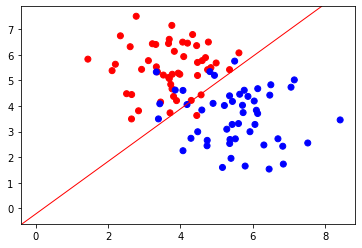

In [7]:
slope      = -1*parameters[0][0]/parameters[1][0]
intercept  = -1*scalar_term[0][0]/parameters[1][0]
plt.scatter(x1_attributes, x2_attributes, c=color)
plt.axline((0, intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()

### Compute The Boundary Assuming Different Covariance Matrices

In [8]:
import math

############# 2.(log((1-p)/p) + log(|Cov1|/|Cov2|) ############
cov_det_1 = np.linalg.det(cov_class_1)
cov_det_2 = np.linalg.det(cov_class_2)
rhs = 2*(math.log(len(class2_x1)/len(class2_x1)) + math.log(cov_det_1/cov_det_2))     

cov_class_1_inv  = np.linalg.inv(cov_class_1)
cov_class_2_inv  = np.linalg.inv(cov_class_2)

###### CLASS 1 COMPUTATIONS ###############
matrix_mul_mean_1   = np.matmul(cov_class_1_inv,  mean_1_vector.transpose())
mean_1_mul_matrix   = np.matmul(mean_1_vector,    cov_class_1_inv)
scalar_term_class_1 = np.matmul(mean_1_vector,    matrix_mul_mean_1)

###### CLASS 2 COMPUTATIONS ###############
matrix_mul_mean_2   = np.matmul(cov_class_2_inv,  mean_2_vector.transpose())
mean_2_mul_matrix   = np.matmul(mean_2_vector,    cov_class_2_inv)
scalar_term_class_2 = np.matmul(mean_2_vector,    matrix_mul_mean_2)

###### COMBINED EQUATION ##################
quad_param_1       = cov_class_2_inv[0][0] - cov_class_1_inv[0][0]
quad_param_2       = cov_class_2_inv[1][1] - cov_class_1_inv[1][1]
quad_1_2           = 2*(cov_class_2_inv[0][1] - cov_class_1_inv[0][1])
linear_parameters  = matrix_mul_mean_1    +  mean_1_mul_matrix.transpose()  -  matrix_mul_mean_2 - mean_2_mul_matrix.transpose()
scalar_term        = scalar_term_class_2  -  scalar_term_class_1            -  rhs



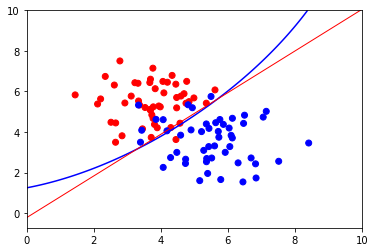

In [9]:
x_arr = np.linspace(0, 10, 400)
y_arr = np.linspace(0, 10, 400)

X, Y = np.meshgrid(x_arr, y_arr)

# Define the implicit equation
Z = quad_param_1*(X**2) + quad_param_2*(Y**2) + quad_1_2*X*Y + linear_parameters[0][0]*X + linear_parameters[1][0]*Y + scalar_term[0][0]

# Plot the implicit curve
plt.contour(X, Y, Z, levels=[0], colors='b')

plt.scatter(x1_attributes, x2_attributes, c=color)
plt.axline((0, intercept), slope=slope, linewidth=1, color='r')# or plt.plot([acidity[0],acidity[1]], [density[0],density[1]])
plt.show()